# Loss Functions
---

In this notebook, we will learn about some details behind the logisitc regression and SVMs of how they are trained and how they predict.

## Coefficients and Prediction Equations

For linear classifiers, the linear decision boundary is given by the following equation

$$
coefficients \cdot features + intercept = 0
$$

And the prediction of a binary classification depends on the sign of the output of the decision boundary equation:

* if it is positive (i.e., $coefficients \cdot features + intercept > 0$, the target prediction is the positive class.
* if it is negative (i.e., $coefficients \cdot features + intercept < 0$, the target prediction is the negative (other) class.

The way the Logisitc regression and linear SVM learns and determines the coefficients and the intercept is different. But the prediction is the same, depending on the sign of the raw output.

Let's take a look using logistic regression and the breast cancer data.

In [3]:
from sklearn.datasets import load_breast_cancer

cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

In [4]:
X.shape

(569, 30)

In [7]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X, y)
lr.predict(X[0].reshape(1, -1))

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0])

For the 10th example, the logisitc regression predicts class 0. If we take a look on the coefficients and the intercept the model learnt

In [8]:
lr.coef_

array([[ 1.23178954,  0.51064487,  0.13641129, -0.01349396, -0.04849279,
        -0.22310055, -0.31201834, -0.13209813, -0.06717637, -0.01348658,
         0.05408529,  0.52790825,  0.22938851, -0.12036012, -0.00437079,
        -0.04697503, -0.06588397, -0.01710445, -0.01616921, -0.00438334,
         1.30739872, -0.50852254, -0.23434145, -0.01350182, -0.08734264,
        -0.69059258, -0.85959629, -0.25322892, -0.21111878, -0.06702401]])

In [9]:
lr.intercept_

array([0.23323045])

and we applied our decision boundary function using those values and embedding the 10th example

In [10]:
lr.coef_ @ X[0] + lr.intercept_

array([-32.63173486])

> `@` represent the dot product

we see that the raw output is negative, thus the model predicts it is the other class (class-0). For the 20th example,

In [13]:
lr.predict(X[20].reshape(1, -1))

array([1])

In [14]:
lr.coef_ @ X[20] + lr.intercept_

array([4.96924809])

We see that the raw output is positive thus predicting the positive class (class-1).

## Loss Function

The loss function is the function that our models tries to minimize to get the optimal set of coefficients and intercept that best fit our data. For example, the loss function for the linear regressor is

$$
\sum_{i=1}^{n} \left( y^{[i]} - \hat{y}^{[i]} \right) ^2
$$

However in classification problems, this is not the best option for our categorized target. A propsed loss function is the 0-1 loss is the 0-1 loss which tells the number of the errors (misclassifications) which returns 0 for a correct classify and 1 for a misclassify.

However, it is very hard to minimize.

We can minimize any function using the `optimize` module from `scipy` package as it contains the function `minimize`.

In [15]:
from scipy.optimize import minimize
import numpy as np

In [16]:
minimize(np.square, 0).x

array([0.])

For

```py
minimize(np.square, 0).x
```
* `np.square` is the function we want to minimize ($y = x^2$)
* 0 is our initial guess $x_0$
* `x` to access the $x$ (input) value that minimizes this function
* `array([0.])` is the value of input that minimizes the function

But already our initial guess is input of the minima of the function, let's try other values.

In [17]:
minimize(np.square, 4).x

array([-8.16599388e-09])

Not exactly 0, but very very close to it which is OK for us.

Let's try using some data. We will use the boston housing data for optimizing the loss function of the linear regression and will compare it to the coefficients of the `sklearn` linear regression class.

In [23]:
from sklearn.datasets import load_boston

X, y = load_boston().data, load_boston().target

def linear_regression_cost_function(w):
    cost = 0
    for i in range(y.shape[0]):
        true_value = y[i]
        predicted_value = w @ X[i] # neglect the intercept for now
        cost += (true_value - predicted_value) ** 2
    return cost

In [25]:
w_optimal = minimize(linear_regression_cost_function, X[0]).x

w_optimal

array([-9.28967654e-02,  4.87153522e-02, -4.05706784e-03,  2.85398641e+00,
       -2.86834921e+00,  5.92815263e+00, -7.26947239e-03, -9.68514449e-01,
        1.71156366e-01, -9.39664771e-03, -3.92187354e-01,  1.49054810e-02,
       -4.16304275e-01])

In [27]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X, y)
lin_reg.coef_

array([-9.28965170e-02,  4.87149552e-02, -4.05997958e-03,  2.85399882e+00,
       -2.86843637e+00,  5.92814778e+00, -7.26933458e-03, -9.68514157e-01,
        1.71151128e-01, -9.39621540e-03, -3.92190926e-01,  1.49056102e-02,
       -4.16304471e-01])

Very close.

## Loss Function Diagram

Let's take a look on the loss function we talked about from a visualization prespective.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Model Raw Output')

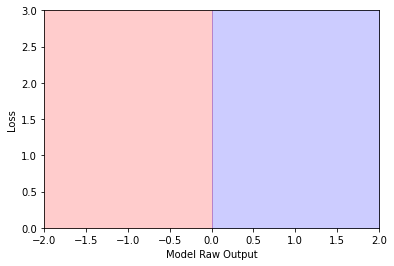

In [35]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(0, 3)
plt.fill_between(np.linspace(-2, 0, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "r")
plt.fill_between(np.linspace(0, 2, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "b")
plt.ylabel("Loss")
plt.xlabel("Model Raw Output")

For the 0-1 loss for an example of target class-1,

Text(0.5, 0, 'Model Raw Output')

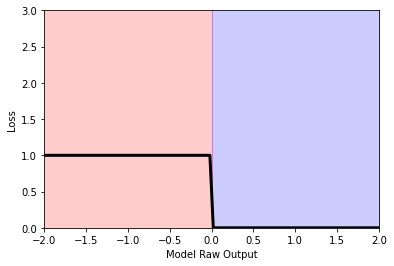

In [43]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(0, 3)
plt.fill_between(np.linspace(-2, 0, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "r")
plt.fill_between(np.linspace(0, 2, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "b")
plt.plot(np.linspace(-2, 2, 100), np.sign(np.linspace(-2, 2, 100)) == -1, color = "k", linewidth = 3) # if it is negative output, it is a misclassification
plt.ylabel("Loss")
plt.xlabel("Model Raw Output")

We can see that that function works well for our classification problem, but it has so many minimas so it is not easy to minimize.

For linear regression cost function.

Text(0.5, 0, 'Model Raw Output')

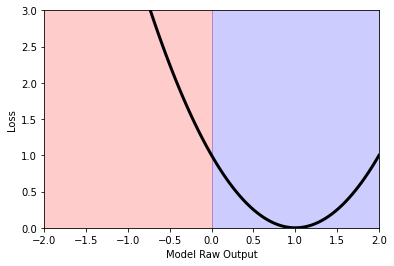

In [44]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(0, 3)
plt.fill_between(np.linspace(-2, 0, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "r")
plt.fill_between(np.linspace(0, 2, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "b")
plt.plot(np.linspace(-2, 2, 100), np.square(np.linspace(-2, 2, 100) - 1), color = "k", linewidth = 3)
plt.ylabel("Loss")
plt.xlabel("Model Raw Output")

We can see that it has one minima, but for larger positive values (after minima), the loss increases which isn't valid for our classification problem. 

If we used the following loss function,

$$
- \sum_{i=1}^{n} \left( y^{[i]} log (\hat{y}^{[i]}) + (1 - y^{[i]}) log (1 - \hat{y}^{[i]}) \right)
$$

where $\hat{y}^{[i]}$ is the sigmoid of the raw output.

In [83]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0.5, 0, 'Model Raw Output')

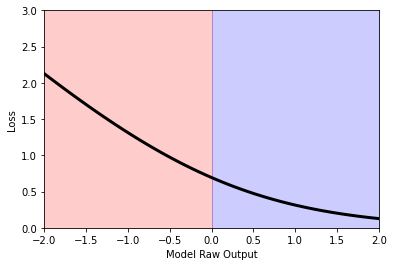

In [84]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(0, 3)
plt.fill_between(np.linspace(-2, 0, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "r")
plt.fill_between(np.linspace(0, 2, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "b")
x = np.linspace(-2, 2, 100)
raw_output_loss = - (np.array([1] * 100) * np.log(sigmoid(x)) + np.array([0] * 100) * np.log(1 - sigmoid(x)))
plt.plot(np.linspace(-2, 2, 100), raw_output_loss, color = "k", linewidth = 3)
plt.ylabel("Loss")
plt.xlabel("Model Raw Output")

seems logical for our classification problem and easy to minimize.

For SVM, a proposed loss function is the hinge loss.

Text(0.5, 0, 'Model Raw Output')

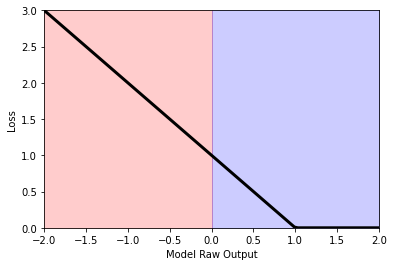

In [89]:
plt.figure()
plt.xlim(-2, 2)
plt.ylim(0, 3)
plt.fill_between(np.linspace(-2, 0, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "r")
plt.fill_between(np.linspace(0, 2, 100), np.array([0] * 100), np.array([3] * 100), alpha = 0.2, color = "b")
x = np.linspace(-2, 2, 100)
raw_output_loss = np.maximum(np.array([0]*100), 1 - x)
plt.plot(np.linspace(-2, 2, 100), raw_output_loss, color = "k", linewidth = 3)
plt.ylabel("Loss")
plt.xlabel("Model Raw Output")

seems logical for our classification problem and easy to minimize.